We aim to analyze a dataset containing information about loans provided by a
Kiva organization. The dataset consists of various attributes related to each loan.

The dataset contains the following columns
1. id: Unique identifier for each loan.
2. Funded_amount: The amount of money funded for the loan.
3. Loan_amount: The total amount of money requested for the loan
4. Sector: The sector for which the loan is intended (e.g., Food, Transportation).
5. Country: The country where the loan is being provided.
6. Partner_id: Identifier for the partner organization facilitating the loan.
7. Term_in_months: The term of the loan in months.
8. Lender_count: The number of lenders contributing to the loan.
9. Borrower_genders: Genders of the borrowers (eg., female, male).
10. Repayment_interval: The interval at which repayments are made (e.g., irregular, bullet).
11. Date: The date when the loan was initiated


# Data Preprcessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [2]:
df = pd.read_csv("masked_kiva_loans.csv")

In [3]:
df

,id,funded_amount,loan_amount,sector,country,partner_id,term_in_months,lender_count,borrower_genders,repayment_interval,date
0,1242201,500,500,Agriculture,Pakistan,245.0,14,14,female,monthly,2/20/2017
1,1165778,325,325,Agriculture,Philippines,145.0,14,13,female,irregular,10/11/2016
2,1123052,800,800,Agriculture,Ecuador,159.0,14,29,female,bullet,7/25/2016
3,1312344,425,425,Agriculture,Philippines,136.0,8,1,female,irregular,6/2/2017
4,861422,275,275,Agriculture,Kenya,133.0,12,11,female,monthly,3/25/2015
...,...,...,...,...,...,...,...,...,...,...,...
33556,886976,500,500,Wholesale,Pakistan,247.0,14,18,female,monthly,5/18/2015
33557,1017003,300,300,Wholesale,Pakistan,247.0,12,12,female,irregular,2/2/2016
33558,831649,225,225,Wholesale,Pakistan,421.0,14,9,female,monthly,1/23/2015
33559,920920,2000,2000,Wholesale,Palestine,80.0,27,54,male,monthly,7/21/2015


In [4]:
df.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,3.356100e+04,33561.000000,33561.000000,32927.000000,33561.000000,33561.000000
mean,9.931834e+05,789.871279,843.059653,177.819145,13.691428,20.549179
std,1.965757e+05,1177.245363,1222.188679,93.838691,8.566574,28.514324
min,6.530490e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.217790e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.945450e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.164156e+06,900.000000,975.000000,204.000000,14.000000,24.000000
max,1.340239e+06,50000.000000,50000.000000,533.000000,145.000000,1481.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33561 entries, 0 to 33560
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  33561 non-null  int64  
 1   funded_amount       33561 non-null  int64  
 2   loan_amount         33561 non-null  int64  
 3   sector              33561 non-null  object 
 4   country             33561 non-null  object 
 5   partner_id          32927 non-null  float64
 6   term_in_months      33561 non-null  int64  
 7   lender_count        33561 non-null  int64  
 8   borrower_genders    33366 non-null  object 
 9   repayment_interval  33561 non-null  object 
 10  date                33561 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 2.8+ MB


In [6]:
df.isnull().sum()

id                      0
funded_amount           0
loan_amount             0
sector                  0
country                 0
partner_id            634
term_in_months          0
lender_count            0
borrower_genders      195
repayment_interval      0
date                    0
dtype: int64

In [7]:
df=df.dropna()

In [8]:
df.isnull().sum()

id                    0
funded_amount         0
loan_amount           0
sector                0
country               0
partner_id            0
term_in_months        0
lender_count          0
borrower_genders      0
repayment_interval    0
date                  0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
def handle_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df

In [11]:
df = handle_outliers(df, 'funded_amount')
df = handle_outliers(df, 'loan_amount')
df = handle_outliers(df, 'lender_count')
df = handle_outliers(df, 'term_in_months')

In [12]:
{column:len(df[column].unique())for column in df.columns}

{'id': 26094,
 'funded_amount': 63,
 'loan_amount': 62,
 'sector': 15,
 'country': 71,
 'partner_id': 210,
 'term_in_months': 22,
 'lender_count': 40,
 'borrower_genders': 501,
 'repayment_interval': 3,
 'date': 1269}

In [13]:
df=df.drop('id',axis=1)

In [14]:
df

,funded_amount,loan_amount,sector,country,partner_id,term_in_months,lender_count,borrower_genders,repayment_interval,date
0,500,500,Agriculture,Pakistan,245.0,14,14,female,monthly,2/20/2017
1,325,325,Agriculture,Philippines,145.0,14,13,female,irregular,10/11/2016
2,800,800,Agriculture,Ecuador,159.0,14,29,female,bullet,7/25/2016
3,425,425,Agriculture,Philippines,136.0,8,1,female,irregular,6/2/2017
4,275,275,Agriculture,Kenya,133.0,12,11,female,monthly,3/25/2015
...,...,...,...,...,...,...,...,...,...,...
33555,350,350,Wholesale,Pakistan,247.0,14,12,female,monthly,11/1/2016
33556,500,500,Wholesale,Pakistan,247.0,14,18,female,monthly,5/18/2015
33557,300,300,Wholesale,Pakistan,247.0,12,12,female,irregular,2/2/2016
33558,225,225,Wholesale,Pakistan,421.0,14,9,female,monthly,1/23/2015


In [15]:
df['borrower_genders'].unique()

array(['female',
       'female, female, female, male, female, male, female, female, female, female, female',
       'female, male, female, female, male',
       'female, male, male, female, female, female, female, male',
       'female, female, female, female, female, female, female, female, female, female, female, female, male',
       'male',
       'female, female, female, female, female, female, female, female, male, female, female',
       'male, male, female, female, male, female, female, male, male, female, female, male, female, female',
       'female, female, male, female, male, female, male, female, male, female, female, female',
       'female, female, female, female',
       'male, female, female, female, female, male, female, male, male, female, female',
       'female, female',
       'male, female, female, male, female, male, male, female, male',
       'male, male, female', 'female, female, female',
       'female, female, female, male, male, male, male, male, female, 

In [16]:
def get_gender_count(genders:str):
    male_count = genders.count('male')
    female_count = genders.count('female')

    # for gender in str(genders).split(','):
    #     if gender.strip() == 'male':
    #         male_count += 1
    #     elif gender.strip() == 'female':
    #         female_count += 1

    return male_count, female_count


In [17]:
df['borrow_male_count'], df['borrow_female_count'] = zip(*df['borrower_genders'].apply(get_gender_count))

In [18]:
df

,funded_amount,loan_amount,sector,country,partner_id,term_in_months,lender_count,borrower_genders,repayment_interval,date,borrow_male_count,borrow_female_count
0,500,500,Agriculture,Pakistan,245.0,14,14,female,monthly,2/20/2017,1,1
1,325,325,Agriculture,Philippines,145.0,14,13,female,irregular,10/11/2016,1,1
2,800,800,Agriculture,Ecuador,159.0,14,29,female,bullet,7/25/2016,1,1
3,425,425,Agriculture,Philippines,136.0,8,1,female,irregular,6/2/2017,1,1
4,275,275,Agriculture,Kenya,133.0,12,11,female,monthly,3/25/2015,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
33555,350,350,Wholesale,Pakistan,247.0,14,12,female,monthly,11/1/2016,1,1
33556,500,500,Wholesale,Pakistan,247.0,14,18,female,monthly,5/18/2015,1,1
33557,300,300,Wholesale,Pakistan,247.0,12,12,female,irregular,2/2/2016,1,1
33558,225,225,Wholesale,Pakistan,421.0,14,9,female,monthly,1/23/2015,1,1


In [19]:
df

,funded_amount,loan_amount,sector,country,partner_id,term_in_months,lender_count,borrower_genders,repayment_interval,date,borrow_male_count,borrow_female_count
0,500,500,Agriculture,Pakistan,245.0,14,14,female,monthly,2/20/2017,1,1
1,325,325,Agriculture,Philippines,145.0,14,13,female,irregular,10/11/2016,1,1
2,800,800,Agriculture,Ecuador,159.0,14,29,female,bullet,7/25/2016,1,1
3,425,425,Agriculture,Philippines,136.0,8,1,female,irregular,6/2/2017,1,1
4,275,275,Agriculture,Kenya,133.0,12,11,female,monthly,3/25/2015,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
33555,350,350,Wholesale,Pakistan,247.0,14,12,female,monthly,11/1/2016,1,1
33556,500,500,Wholesale,Pakistan,247.0,14,18,female,monthly,5/18/2015,1,1
33557,300,300,Wholesale,Pakistan,247.0,12,12,female,irregular,2/2/2016,1,1
33558,225,225,Wholesale,Pakistan,421.0,14,9,female,monthly,1/23/2015,1,1


In [20]:
df =df.drop('borrower_genders',axis=1)

In [21]:
df

,funded_amount,loan_amount,sector,country,partner_id,term_in_months,lender_count,repayment_interval,date,borrow_male_count,borrow_female_count
0,500,500,Agriculture,Pakistan,245.0,14,14,monthly,2/20/2017,1,1
1,325,325,Agriculture,Philippines,145.0,14,13,irregular,10/11/2016,1,1
2,800,800,Agriculture,Ecuador,159.0,14,29,bullet,7/25/2016,1,1
3,425,425,Agriculture,Philippines,136.0,8,1,irregular,6/2/2017,1,1
4,275,275,Agriculture,Kenya,133.0,12,11,monthly,3/25/2015,1,1
...,...,...,...,...,...,...,...,...,...,...,...
33555,350,350,Wholesale,Pakistan,247.0,14,12,monthly,11/1/2016,1,1
33556,500,500,Wholesale,Pakistan,247.0,14,18,monthly,5/18/2015,1,1
33557,300,300,Wholesale,Pakistan,247.0,12,12,irregular,2/2/2016,1,1
33558,225,225,Wholesale,Pakistan,421.0,14,9,monthly,1/23/2015,1,1


In [22]:
#Analyze the mean funded and loan amount across sectors, countries, partners, and repayment intervals
def analyze_sum_loan_funded(df, group_by_column):
  sum = df.groupby(group_by_column)[['loan_amount', 'funded_amount']].sum().sort_values(by= ['loan_amount', 'funded_amount'],ascending=False)
  return sum


In [23]:
sector_sum = analyze_sum_loan_funded(df, 'sector')
print(sector_sum)

                loan_amount  funded_amount
sector                                    
Agriculture         3493450        3308975
Food                2577350        2473500
Retail              2471375        2314100
Services             813175         767350
Clothing             653225         612400
Housing              589650         541050
Education            579850         571600
Personal Use         403750         384575
Transportation       331700         308325
Arts                 199700         197925
Health               169825         165150
Construction         123650         120200
Manufacturing        122425         121075
Entertainment         14700          14700
Wholesale              7350           7350


In [24]:
country_sum = analyze_sum_loan_funded(df, 'country')
print(country_sum)

               loan_amount  funded_amount
country                                  
Philippines        2684325        2646625
Kenya              1353475        1251000
El Salvador        1021100         903750
Pakistan            601400         572800
Peru                558775         548250
...                    ...            ...
South Sudan            850            850
United States          750            750
Thailand               700            700
Moldova                575            575
Somalia                300            300

[71 rows x 2 columns]


In [25]:
repayment_interval_sum = analyze_sum_loan_funded(df, 'repayment_interval')
print(repayment_interval_sum)

                    loan_amount  funded_amount
repayment_interval                            
monthly                 6940050        6513675
irregular               4322525        4226275
bullet                  1288600        1168325


# Data Visualization

In [26]:
def analyze_top_categories(df, date_col, category_col, target_col, top_n=3):

    df['Year'] = pd.to_datetime(df[date_col]).dt.year
    aggregated_data = []

    for year, data in df.groupby('Year'):
        top_categories = data.groupby(category_col)[target_col].sum().nlargest(top_n).reset_index()
        top_categories['Year'] = year
        aggregated_data.append(top_categories)

    aggregated_df = pd.concat(aggregated_data)
    pivot_df = aggregated_df.pivot(index='Year', columns=category_col, values=target_col).fillna(0)

    plt.figure(figsize=(8, 6))
    sns.lineplot(data=pivot_df)
    plt.title(f'Top {top_n} {category_col.title()}s Over Time (Based on {target_col.title()})')
    plt.ylabel(f'Total {target_col.title()}')
    plt.xlabel('Year')
    plt.legend(title=f'{category_col.title()}s', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


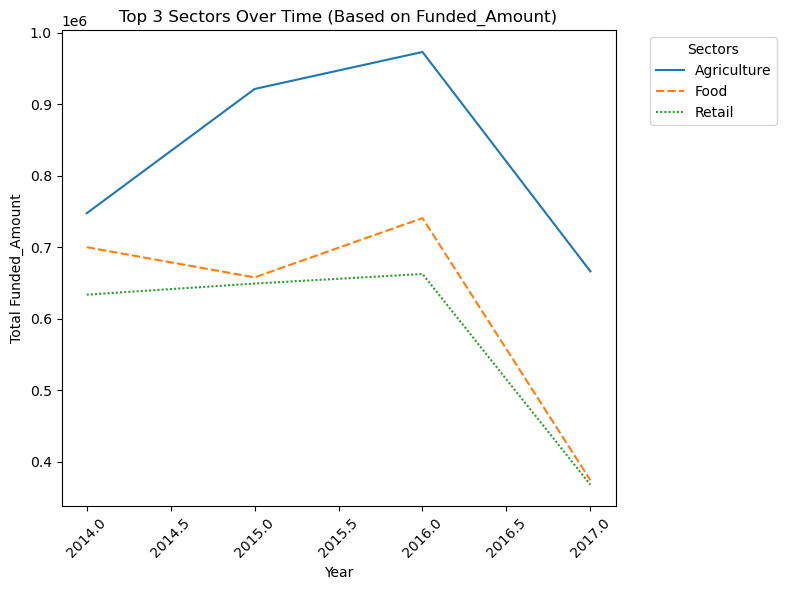

In [27]:
# top 3 sectors for which the loan is intended
analyze_top_categories(df, 'date', 'sector', 'funded_amount')

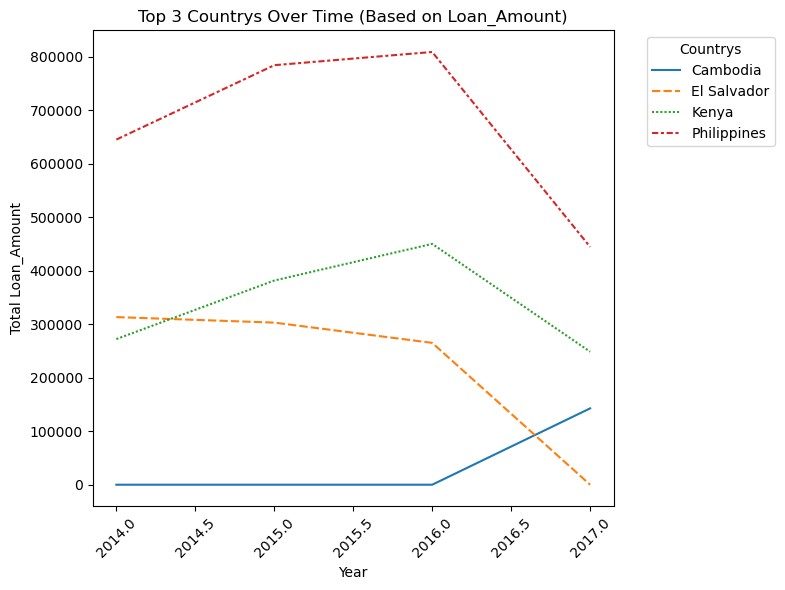

In [28]:
#top 5 the countries where the loan is being provided.
analyze_top_categories(df, 'date', 'country', 'loan_amount')


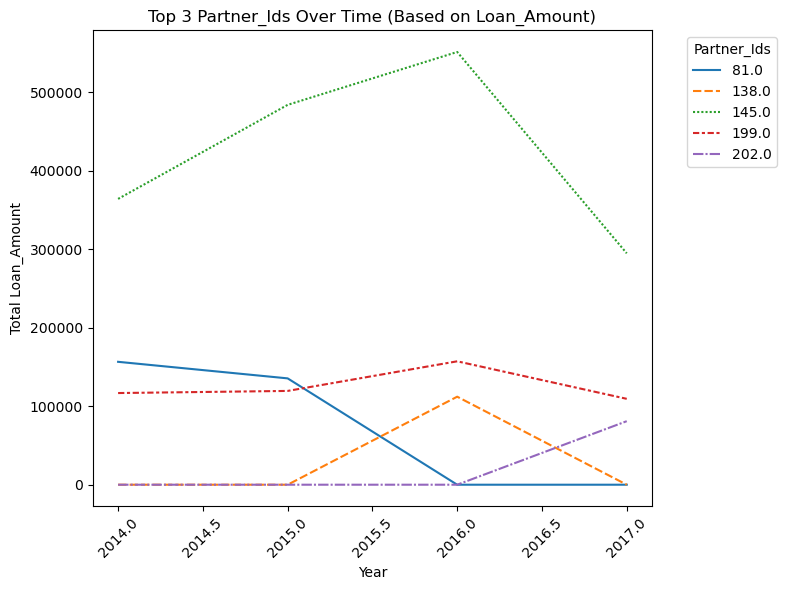

In [29]:
#top 5 the partner organization facilitating the loan over time
analyze_top_categories(df, 'date', 'partner_id', 'loan_amount')


In [30]:
#Is there a correlation between the number of lenders and the funded loan amount?
correlation = df['lender_count'].corr(df['funded_amount'])
print("Correlation Coefficient:", correlation)

Correlation Coefficient: 0.8123050821109481


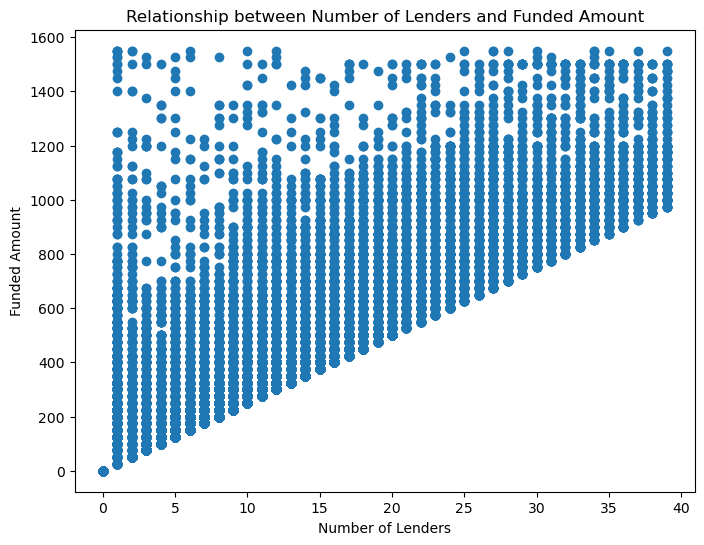

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(df['lender_count'], df['funded_amount'])
plt.xlabel('Number of Lenders')
plt.ylabel('Funded Amount')
plt.title('Relationship between Number of Lenders and Funded Amount')
plt.show()

In [32]:
#Is there a correlation between the number of lenders and the funded loan amount?
correlation = df['lender_count'].corr(df['funded_amount'])
print("Correlation Coefficient:", correlation)
#0.8123 strong positive correlation

Correlation Coefficient: 0.8123050821109481


In [33]:
# Analyze the distribution of repayment interval sum over time
repayment_df = df.groupby(['Year', 'repayment_interval']).size().unstack(fill_value=0)
fig = px.bar(repayment_df, x=repayment_df.index, y=repayment_df.columns,
               title="Distribution of Repayment Intervals Over Time",
               labels={'x': 'Year', 'value': 'Number of Loans'})
fig.update_layout(barmode='stack')
fig.show()

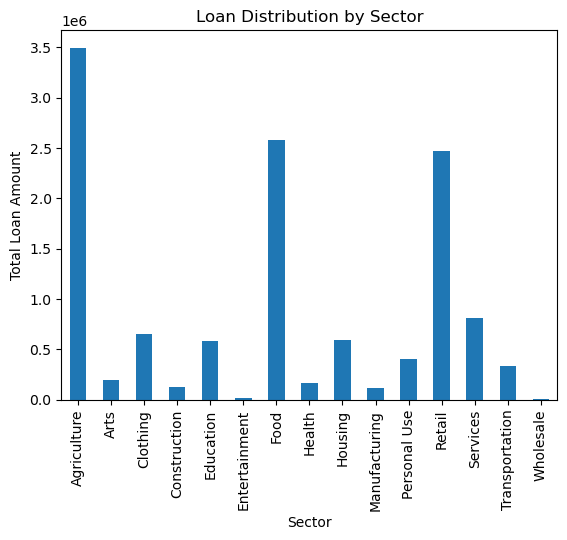

In [34]:
# Bar chart for loan amount by sector
df.groupby('sector')['loan_amount'].sum().plot(kind='bar')
plt.xlabel('Sector')
plt.ylabel('Total Loan Amount')
plt.title('Loan Distribution by Sector')
plt.show()

# Time Series

In [35]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from datetime import datetime, timedelta

In [36]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
# Extract year and month from date
df['month'] = df.index.month
df.head()

,funded_amount,loan_amount,sector,country,partner_id,term_in_months,lender_count,repayment_interval,borrow_male_count,borrow_female_count,Year,month
date,,,,,,,,,,,,
2017-02-20,500,500,Agriculture,Pakistan,245.0,14,14,monthly,1,1,2017,2
2016-10-11,325,325,Agriculture,Philippines,145.0,14,13,irregular,1,1,2016,10
2016-07-25,800,800,Agriculture,Ecuador,159.0,14,29,bullet,1,1,2016,7
2017-06-02,425,425,Agriculture,Philippines,136.0,8,1,irregular,1,1,2017,6
2015-03-25,275,275,Agriculture,Kenya,133.0,12,11,monthly,1,1,2015,3


In [37]:
data_weekly = df['funded_amount'].resample('W').sum()

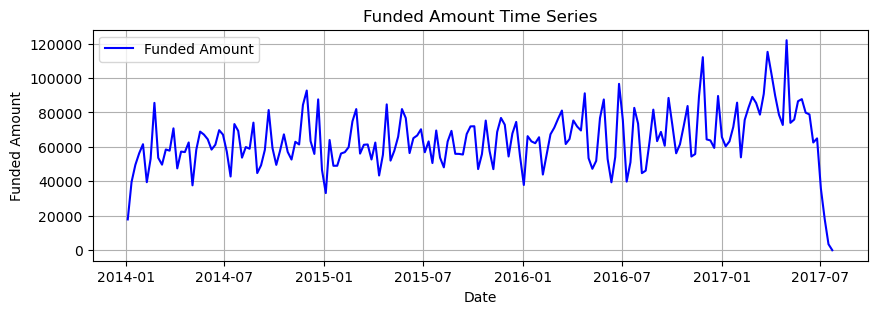

In [38]:
plt.figure(figsize=(10,3))
plt.plot(data_weekly.index,data_weekly,label='Funded Amount',color='blue')
plt.title('Funded Amount Time Series')
plt.xlabel('Date')
plt.ylabel('Funded Amount')
plt.legend(loc='best')
plt.grid(True)
plt.show()

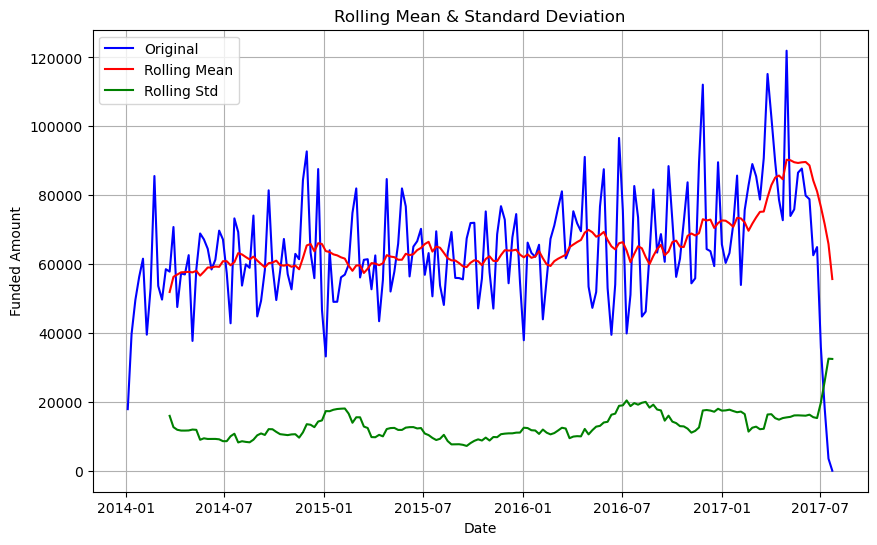

ADF Statistic: -3.614591114077999
p-value: 0.005488126409193675
Lag 15
Critical Values:
	1%: -3.469413468959902
	5%: -2.8786964197028295
	10%: -2.5759166089965397


In [39]:
# Step 2: Stationarize the series
def stationarize_series(series):
    # Calculate rolling statistics
    rolling_mean = series.rolling(window=12).mean()
    rolling_std = series.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(10, 6))
    plt.plot(series, label='Original', color='blue')
    plt.plot(rolling_mean, label='Rolling Mean', color='red')
    plt.plot(rolling_std, label='Rolling Std', color='green')
    plt.title('Rolling Mean & Standard Deviation')
    plt.xlabel('Date')
    plt.ylabel('Funded Amount')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    # Perform Dickey-Fuller test
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Lag', result[2])

    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

# Apply stationarize_series function
stationarize_series(data_weekly)



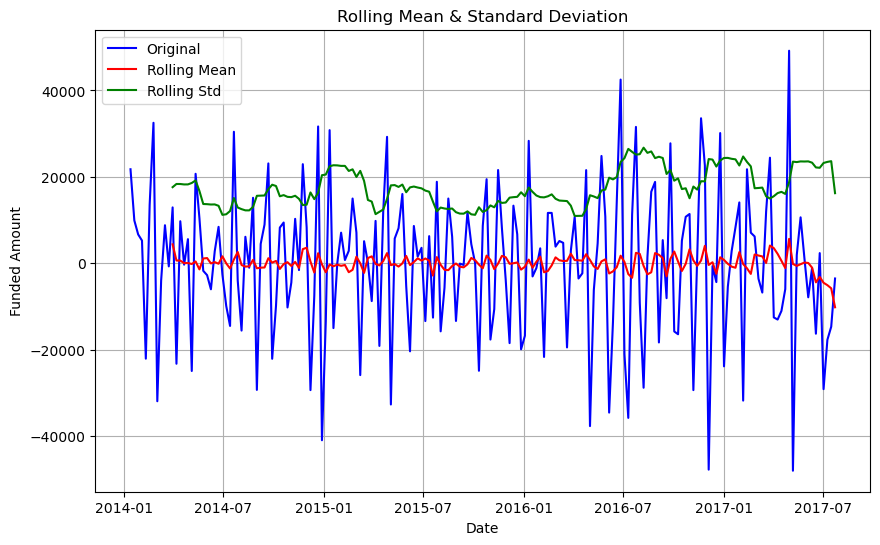

ADF Statistic: -0.6181965857898375
p-value: 0.8668171060371471
Lag 14
Critical Values:
	1%: -3.469413468959902
	5%: -2.8786964197028295
	10%: -2.5759166089965397


In [40]:
# We will choose 1st order differencing because it is near to stationary
stationarize_series(data_weekly.diff().dropna())

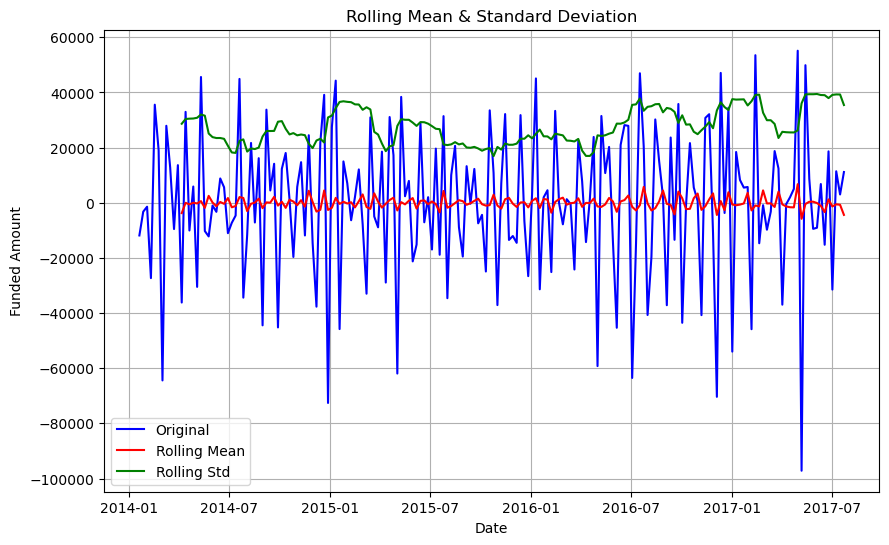

ADF Statistic: -5.241444411552863
p-value: 7.231384010157255e-06
Lag 14
Critical Values:
	1%: -3.469648263987657
	5%: -2.878798906308495
	10%: -2.5759713094779593


In [41]:
stationarize_series(data_weekly.diff().diff().dropna())

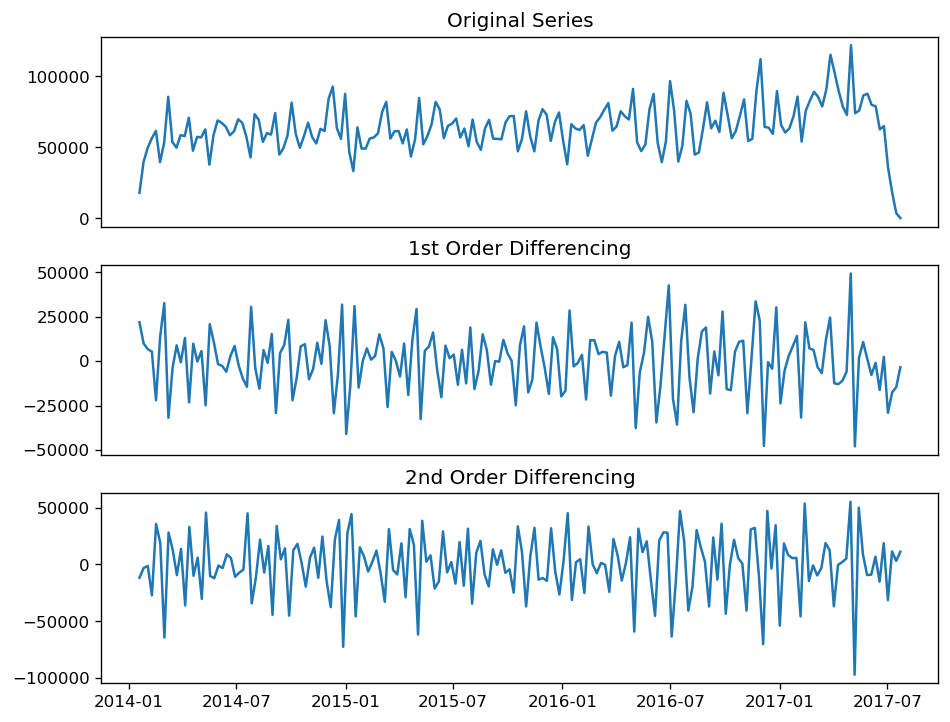

In [42]:
# Finding the value of the d parameter
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(data_weekly); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(data_weekly.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(data_weekly.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

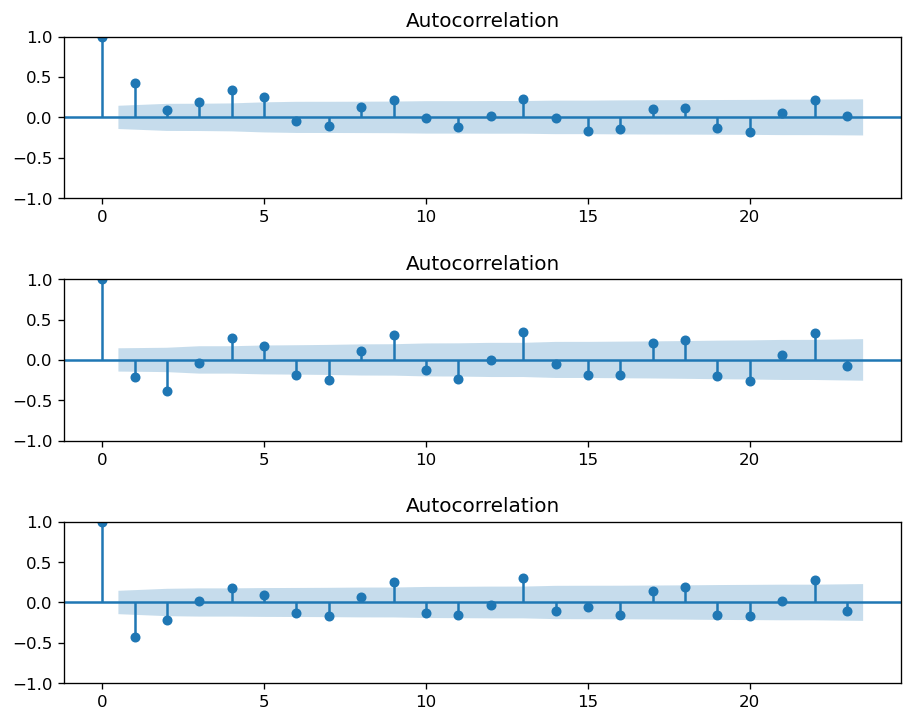

In [43]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(data_weekly, ax=ax1)
plot_acf(data_weekly.diff().dropna(), ax=ax2)
plot_acf(data_weekly.diff().diff().dropna(), ax=ax3)
# Adjust padding between subplots
plt.subplots_adjust(hspace=0.5)


plt.show()

c:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



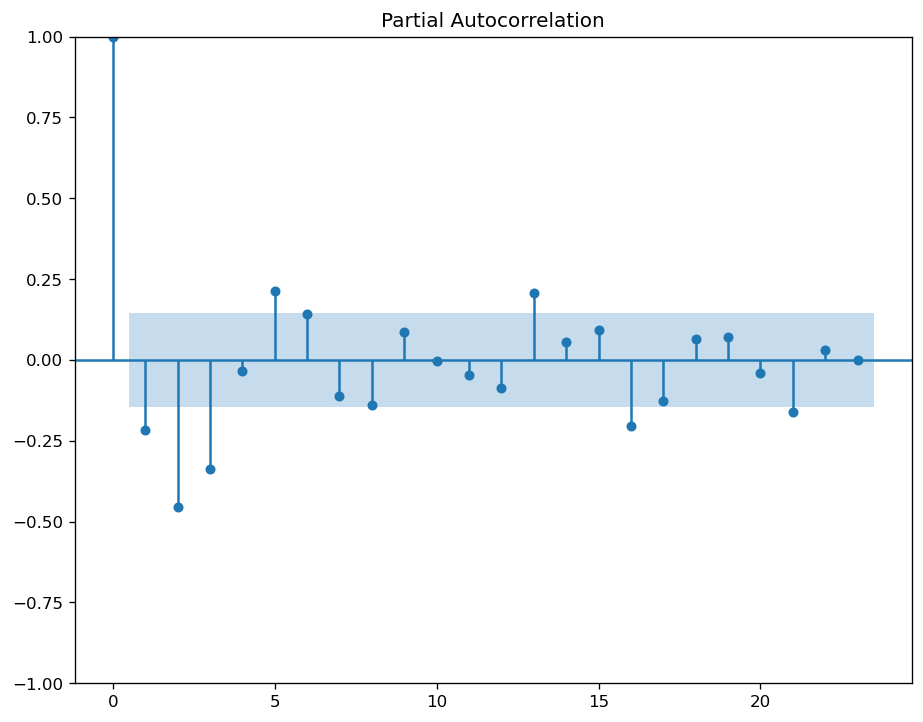

In [44]:
# Finding the value of the p parameter

from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data_weekly.diff().dropna())

plt.show()


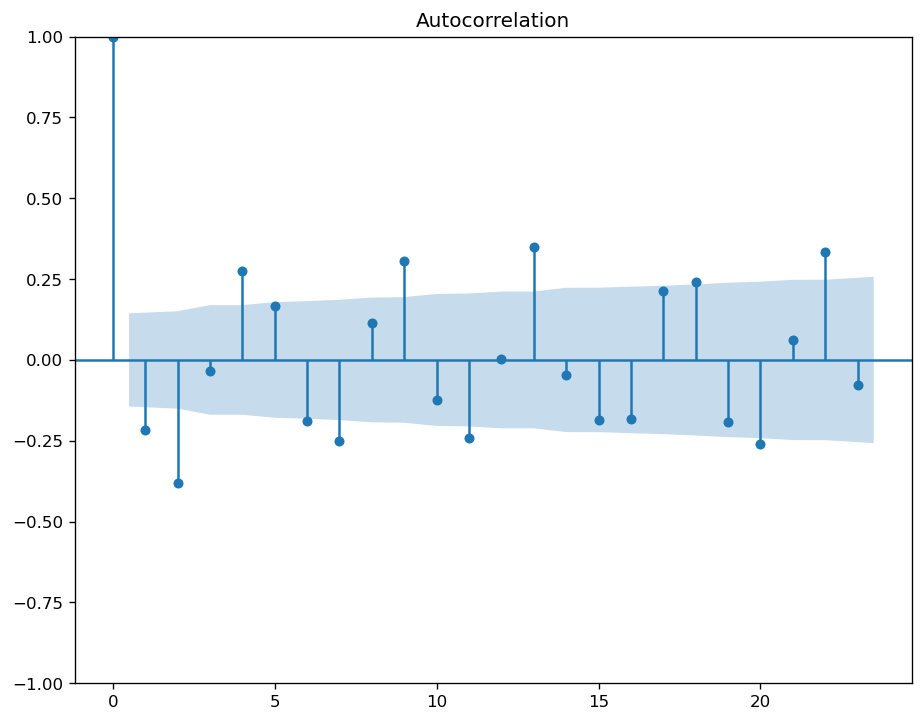

In [45]:
# Finding the value of the q parameter
plot_acf(data_weekly.diff().dropna())
plt.show()



In [46]:
# Step 4: Build the ARIMA model
# Based on the ACF and PACF plots, we can try ARIMA(1,1,1) or ARIMA(1,1,2)
model = ARIMA(data_weekly, order=(3,0,14))
arima_model = model.fit()
#arima_model.summary()

# Step 5: Predict
forecast = arima_model.predict()
#forecast = arima_model.forecast()



c:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [47]:
data_weekly

date
2014-01-05    17900
2014-01-12    39675
2014-01-19    49600
2014-01-26    56300
2014-02-02    61575
              ...  
2017-06-25    64950
2017-07-02    35850
2017-07-09    18175
2017-07-16     3525
2017-07-23       25
Freq: W-SUN, Name: funded_amount, Length: 186, dtype: int64

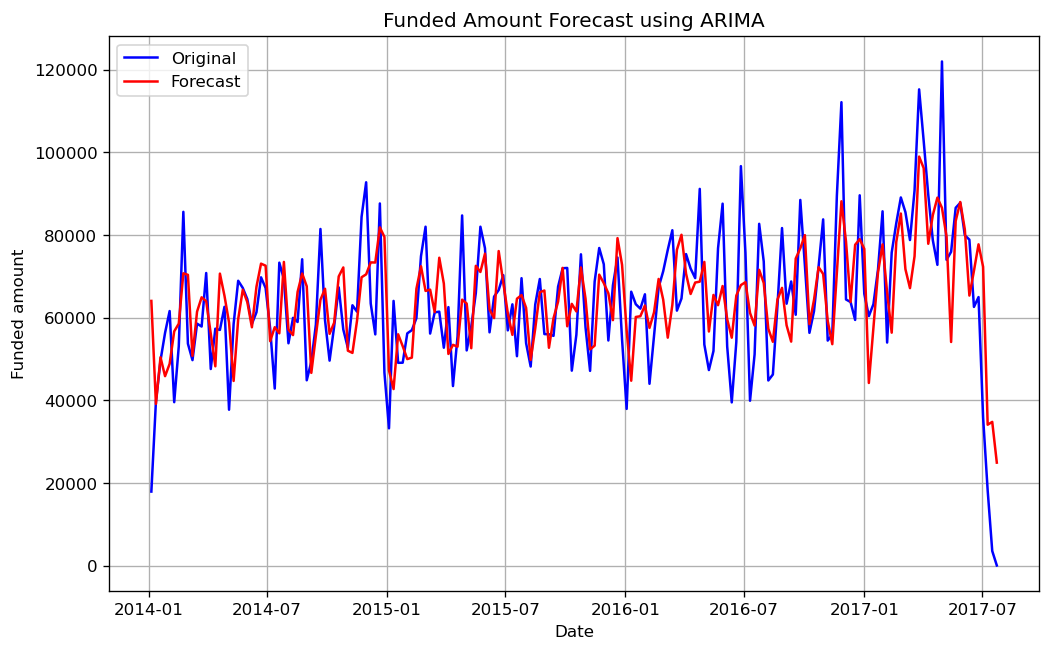

In [48]:
# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(data_weekly.index, data_weekly, label='Original', color='blue')
plt.plot(data_weekly.index ,  forecast, label='Forecast', color='red')
plt.title('Funded Amount Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Funded amount')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [49]:
data_weekly

date
2014-01-05    17900
2014-01-12    39675
2014-01-19    49600
2014-01-26    56300
2014-02-02    61575
              ...  
2017-06-25    64950
2017-07-02    35850
2017-07-09    18175
2017-07-16     3525
2017-07-23       25
Freq: W-SUN, Name: funded_amount, Length: 186, dtype: int64

In [50]:
# Step 5: Predict
start_index ="2014-01-05"
end_index = "2017-07-23"
predicted = arima_model.predict(start=start_index, end=end_index )

print(predicted)

date
2014-01-05    64022.983594
2014-01-12    39118.563524
2014-01-19    50394.437282
2014-01-26    45816.845299
2014-02-02    48798.058303
                  ...     
2017-06-25    77711.806133
2017-07-02    72269.751592
2017-07-09    34072.691858
2017-07-16    34761.585731
2017-07-23    24900.711854
Freq: W-SUN, Name: predicted_mean, Length: 186, dtype: float64


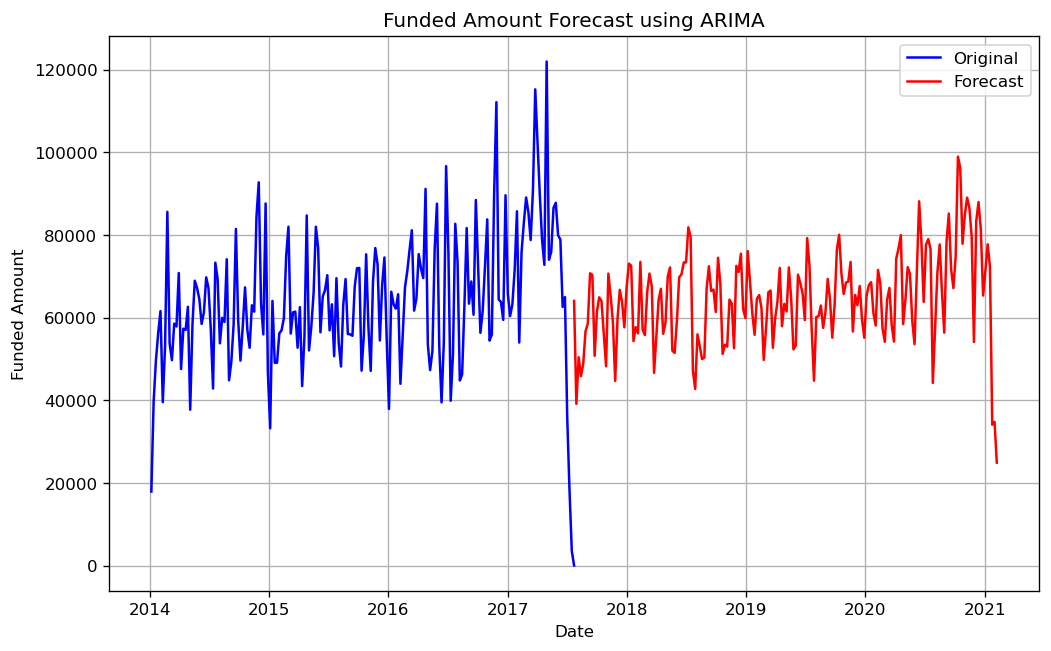

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(data_weekly.index, data_weekly, label='Original', color='blue')
forecast_dates = pd.date_range(start=data_weekly.index[-1], periods=len(forecast), freq='W')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.title('Funded Amount Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Funded Amount')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [52]:
data_weekly

date
2014-01-05    17900
2014-01-12    39675
2014-01-19    49600
2014-01-26    56300
2014-02-02    61575
              ...  
2017-06-25    64950
2017-07-02    35850
2017-07-09    18175
2017-07-16     3525
2017-07-23       25
Freq: W-SUN, Name: funded_amount, Length: 186, dtype: int64

In [53]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(data_weekly, predicted))
print("RMSE:", rmse)


RMSE: 12700.710223872815


# Machine Learning Algorithms

In [54]:
# label encoding
df = pd.get_dummies(df, columns=['sector', 'country',  'repayment_interval'])

In [55]:
df

,funded_amount,loan_amount,partner_id,term_in_months,lender_count,borrow_male_count,borrow_female_count,Year,month,sector_Agriculture,...,country_Uganda,country_Ukraine,country_United States,country_Vietnam,country_Yemen,country_Zambia,country_Zimbabwe,repayment_interval_bullet,repayment_interval_irregular,repayment_interval_monthly
date,,,,,,,,,,,,,,,,,,,,,
2017-02-20,500,500,245.0,14,14,1,1,2017,2,1,...,0,0,0,0,0,0,0,0,0,1
2016-10-11,325,325,145.0,14,13,1,1,2016,10,1,...,0,0,0,0,0,0,0,0,1,0
2016-07-25,800,800,159.0,14,29,1,1,2016,7,1,...,0,0,0,0,0,0,0,1,0,0
2017-06-02,425,425,136.0,8,1,1,1,2017,6,1,...,0,0,0,0,0,0,0,0,1,0
2015-03-25,275,275,133.0,12,11,1,1,2015,3,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-11-01,350,350,247.0,14,12,1,1,2016,11,0,...,0,0,0,0,0,0,0,0,0,1
2015-05-18,500,500,247.0,14,18,1,1,2015,5,0,...,0,0,0,0,0,0,0,0,0,1
2016-02-02,300,300,247.0,12,12,1,1,2016,2,0,...,0,0,0,0,0,0,0,0,1,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26094 entries, 2017-02-20 to 2015-08-13
Data columns (total 98 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   funded_amount                                 26094 non-null  int64  
 1   loan_amount                                   26094 non-null  int64  
 2   partner_id                                    26094 non-null  float64
 3   term_in_months                                26094 non-null  int64  
 4   lender_count                                  26094 non-null  int64  
 5   borrow_male_count                             26094 non-null  int64  
 6   borrow_female_count                           26094 non-null  int64  
 7   Year                                          26094 non-null  int64  
 8   month                                         26094 non-null  int64  
 9   sector_Agriculture                          

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = df.drop(['funded_amount'], axis=1)
y = df['funded_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2
                                                    , random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate using regression metrics
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 8098.38274779373
R^2 Score: 0.9084642368891586


In [58]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest R^2 Score: {r2_rf}')

Random Forest Mean Squared Error: 3961.930323176026
Random Forest R^2 Score: 0.9552184273307284
